In [26]:
import pandas as pd
import numpy as np


In [27]:
import os
os.getcwd()

'/Users/arinaafanasieva/PycharmProjects/gp3-hse-uraura/1part'

In [28]:
df = pd.read_csv("./data_ab.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2025-01-21 22:11:48.556739,control,old_page,0
1,804228,2025-01-12 08:01:45.159739,control,old_page,0
2,661590,2025-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2025-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2025-01-21 01:52:26.210827,control,old_page,1


In [29]:
df.shape

(294478, 5)

#1.EDA

1. проверим дубликаты юзеров

In [30]:
len(df) == df["user_id"].nunique()


False

In [31]:
dupes = df["user_id"].value_counts()
dupes[dupes > 1]


user_id
805339    2
754884    2
722274    2
783176    2
898232    2
         ..
847058    2
889392    2
664150    2
835401    2
736955    2
Name: count, Length: 3894, dtype: int64

In [32]:
# 1. Находим user_id, которые встречаются больше 1 раза
dupes_ids = df["user_id"].value_counts()
dupes_ids = dupes_ids[dupes_ids > 1].index

# 2. Выводим все строки, где user_id дублируется
duplicate_rows = df[df["user_id"].isin(dupes_ids)]

# 3. Сортировка по user_id
duplicate_rows_sorted = duplicate_rows.sort_values(by="user_id")

duplicate_rows_sorted


,user_id,timestamp,group,landing_page,converted
230259,630052,2025-01-17 01:16:05.208766,treatment,new_page,0
213114,630052,2025-01-07 12:25:54.089486,treatment,old_page,1
22513,630126,2025-01-14 13:35:54.778695,treatment,old_page,0
251762,630126,2025-01-19 17:16:00.280440,treatment,new_page,0
183371,630137,2025-01-20 02:08:49.893878,control,old_page,0
...,...,...,...,...,...
142354,945703,2025-01-08 19:40:51.169351,control,new_page,0
186960,945797,2025-01-13 17:23:21.750962,control,old_page,0
40370,945797,2025-01-11 03:04:49.433736,control,new_page,1
165143,945971,2025-01-16 10:09:18.383183,control,old_page,0


2. удаляем несовпадения

In [33]:


df_clean = df[
    ((df["group"] == "treatment") & (df["landing_page"] == "new_page")) |
    ((df["group"] == "control") & (df["landing_page"] == "old_page"))
]
df_clean

,user_id,timestamp,group,landing_page,converted
0,851104,2025-01-21 22:11:48.556739,control,old_page,0
1,804228,2025-01-12 08:01:45.159739,control,old_page,0
2,661590,2025-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2025-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2025-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2025-01-03 22:28:38.630509,control,old_page,0
294474,945152,2025-01-12 00:51:57.078372,control,old_page,0
294475,734608,2025-01-22 11:45:03.439544,control,old_page,0
294476,697314,2025-01-15 01:20:28.957438,control,old_page,0


In [34]:
len(df) - len(df_clean)


3893

In [35]:
dupes = df_clean["user_id"].value_counts()
dupes[dupes > 1]

user_id
773192    2
Name: count, dtype: int64

In [36]:
df_clean[df_clean["user_id"]==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2025-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2025-01-14 02:55:59.590927,treatment,new_page,0


оставим первый визит пользователя

In [37]:
df_final = df_clean.sort_values("timestamp").drop_duplicates(subset="user_id", keep="first")
df_final.shape

(290584, 5)

In [38]:
df = df_final

3. делим на 2 датасета один - df_control, второй - df_treatment

In [39]:
df_control = df[df["group"]=="control"]
df_control.head()

,user_id,timestamp,group,landing_page,converted
184884,781507,2025-01-02 13:42:15.234051,control,old_page,0
83878,737319,2025-01-02 13:42:21.786186,control,old_page,0
112584,799109,2025-01-02 13:42:45.219901,control,old_page,0
126997,643921,2025-01-02 13:43:03.767329,control,old_page,1
189698,677659,2025-01-02 13:43:32.744957,control,old_page,0


In [40]:
df_treatment = df[df["group"]=="treatment"]
df_treatment.head()

,user_id,timestamp,group,landing_page,converted
131228,922696,2025-01-02 13:42:05.378582,treatment,new_page,0
102717,818377,2025-01-02 13:42:26.640581,treatment,new_page,0
158789,725857,2025-01-02 13:42:27.851110,treatment,new_page,0
191378,762651,2025-01-02 13:42:28.522322,treatment,new_page,0
111830,722516,2025-01-02 13:42:34.033708,treatment,new_page,0


In [41]:
df_control.shape

(145274, 5)

In [42]:
df_treatment.shape

(145310, 5)

In [43]:
n_control = len(df_control)
n_treatment = len(df_treatment)
total = n_control + n_treatment

print("Control %:", n_control/total * 100)
print("Treatment %:", n_treatment/total * 100)


Control %: 49.99380557773312
Treatment %: 50.00619442226688


Небольшая разница в размере групп — норма.
При случайном распределении и последующей очистке данных группы почти никогда
не получаются равными.
Главное, что перекос минимальный — значит сплит корректен.


# 2.проверка сплита

# 2.AA тест

# 2.1 AA тест контрольная группа

гипотеза: подгруппы группы а имеют одинаковую конверсию (сплит-система сформирована корректна)

1. разобьем df_control ранодмно на две группы

2. находим конверсию двух группт - среднее по бинарному признаку = доля единиц

In [44]:
np.random.seed(67)
mask = np.random.rand(len(df_control)) < 0.5

A1 = df_control[mask]
A2 = df_control[~mask]


In [45]:
CR_A1 = A1["converted"].mean()
CR_A2 = A2["converted"].mean()

3. проводим z-test: считаем количество пользователей в А1 и А2, проверяем, что они одинаковые, считаем единицы - находим количество сконверсированных пользователей

nobs - количество пользователей в целом

stat - на сколько сильно отличается количество групп

p-value - проверка гипотезы

In [46]:
!pip install statsmodels

In [47]:
from statsmodels.stats.proportion import proportions_ztest

count = [A1["converted"].sum(), A2["converted"].sum()]
nobs = [len(A1), len(A2)]

stat, p_value = proportions_ztest(count, nobs)
stat, p_value

(np.float64(1.0673999957932971), np.float64(0.2857912503670307))

вывод: p-value = 0.285 > 0,05, значит нулевую гипотезу принимаем, контрольная группа сформирована корректно

После проверки одного теста перешли к проверки 10000 тестов для контрольной группы, чтобы убедиться в корректности распределения

In [48]:
!pip install matplotlib

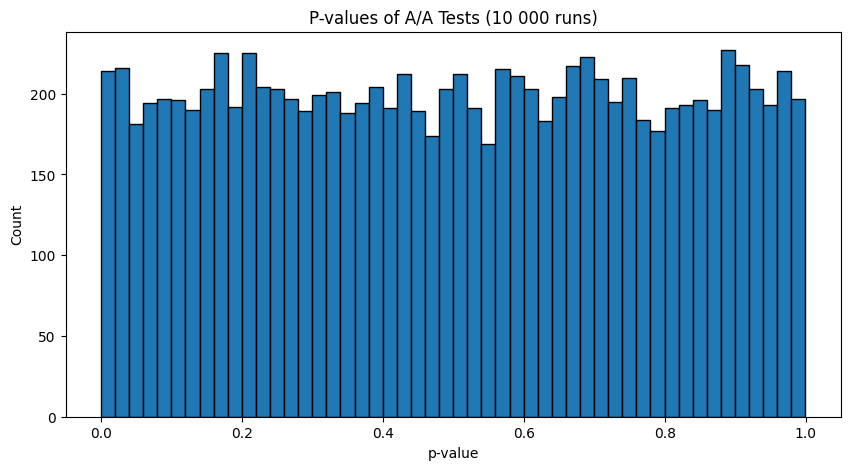

In [49]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

p_values_control = []

df_control = df_clean[df_clean["group"] == "control"]

np.random.seed(42)

for i in range(10000):   # <-- увеличили количество тестов
    mask = np.random.rand(len(df_control)) < 0.5
    A1 = df_control[mask]
    A2 = df_control[~mask]

    count = [A1["converted"].sum(), A2["converted"].sum()]
    nobs = [len(A1), len(A2)]

    _, p_value = proportions_ztest(count, nobs)
    p_values_control.append(p_value)

# Гистограмма
plt.figure(figsize=(10,5))
plt.hist(p_values_control, bins=50, edgecolor='black')  # увеличили количество бинов
plt.title("P-values of A/A Tests (10 000 runs)")
plt.xlabel("p-value")
plt.ylabel("Count")
plt.show()


5. теперь проведем тест, который покажет, что распрделение действительно равномерное

In [50]:
import numpy as np
from scipy.stats import chisquare

p_values = np.array(p_values_control)

k = 20
bins = np.linspace(0, 1, k + 1)


counts, _ = np.histogram(p_values, bins=bins)

N = len(p_values)
expected = np.ones(k) * (N / k)
chi2_stat, p_val = chisquare(f_obs=counts, f_exp=expected)

print("Chi-square stat:", chi2_stat)
print("p-value:", p_val)

Chi-square stat: 20.247999999999998
p-value: 0.37979603185304806


По результатам χ²-теста распределения p-value из серии A/A-тестов можно сделать вывод, что группы сформированы корректно и статистический тест работает ожидаемо. Полученное значение p-value χ²-проверки составляет 0.38, что значительно выше стандартного порога значимости 0.05. Это означает, что у нас нет оснований отвергать гипотезу о равномерном распределении p-value. Следовательно, наблюдаемые отклонения объясняются естественным статистическим шумом, а не систематическим смещением или ошибками в рандомизации. Таким образом, A/A-тест подтверждает, что разбиение пользователей на подгруппы внутри контрольной и используемый статистический метод корректны, и можно переходить к анализу A/B-теста.

##2.2 AA тест тестовой группы


Мы также сделали A/A-тест для treatment, случайно разбив его на две части. Так как это одна и та же группа, статистически значимых различий быть не должно.

Нулевая гипотеза: подгруппы тестовой группы  имеют одинаковую конверсию (сплит-система сформирована корректна)

Если p-value > 0.05 — эксперимент корректен, treatment-группа однородна.

In [51]:
df_treat = df_clean[df_clean["group"] == "treatment"]

import numpy as np
np.random.seed(42)

mask = np.random.rand(len(df_treat)) < 0.5

T1 = df_treat[mask]
T2 = df_treat[~mask]

CR_T1 = T1["converted"].mean()
CR_T2 = T2["converted"].mean()

CR_T1, CR_T2


(np.float64(0.11892182693501442), np.float64(0.11869318025762861))

In [52]:
from statsmodels.stats.proportion import proportions_ztest

count = [T1["converted"].sum(), T2["converted"].sum()]
nobs = [len(T1), len(T2)]

stat, p_value = proportions_ztest(count, nobs)
stat, p_value


(np.float64(0.13468714045268054), np.float64(0.8928592409711998))

p-value = 0.8929 > 0.05, поэтому мы не отвергаем нулевую гипотезу. Статистически значимых различий между двумя случайно сформированными подгруппами treatment нет. A/A тест успешно пройден — тестовая группа однородна.

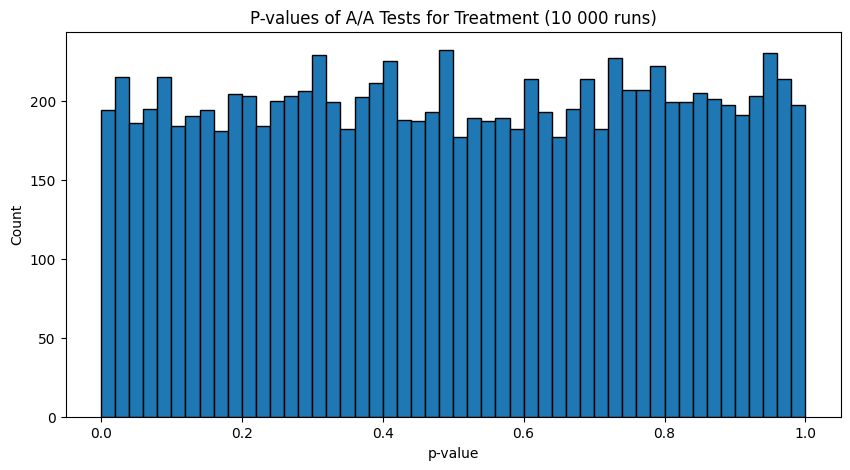

In [53]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

df_treatment = df_clean[df_clean["group"] == "treatment"]

p_values_treat = []

np.random.seed(42)

for i in range(10000):
    mask = np.random.rand(len(df_treatment)) < 0.5
    T1 = df_treatment[mask]
    T2 = df_treatment[~mask]

    count = [T1["converted"].sum(), T2["converted"].sum()]
    nobs = [len(T1), len(T2)]

    _, p_value = proportions_ztest(count, nobs)
    p_values_treat.append(p_value)

plt.figure(figsize=(10,5))
plt.hist(p_values_treat, bins=50, edgecolor='black')
plt.title("P-values of A/A Tests for Treatment (10 000 runs)")
plt.xlabel("p-value")
plt.ylabel("Count")
plt.show()


In [54]:
import numpy as np
from scipy.stats import chisquare

p_values = np.array(p_values_treat)

k = 20
bins = np.linspace(0, 1, k + 1)


counts, _ = np.histogram(p_values, bins=bins)

N = len(p_values)
expected = np.ones(k) * (N / k)
chi2_stat, p_val = chisquare(f_obs=counts, f_exp=expected)

print("Chi-square stat:", chi2_stat)
print("p-value:", p_val)

Chi-square stat: 16.564
p-value: 0.6193793337204047


По результатам χ²-теста распределения p-value для тестовой группы можно заключить, что разбиение и работа теста остаются корректными. Полученное значение статистики χ² составляет 16.56, а соответствующее p-value равно 0.62. Это существенно выше порога 0.05, поэтому у нас нет оснований отвергать гипотезу о равномерном распределении p-value. Такой результат означает, что в данных отсутствуют признаки систематического смещения или аномалий в рандомизации для тестовой выборки. Наблюдаемые колебания частот p-value по интервалам полностью укладываются в рамки статистического шума. Следовательно, A/A-тест подтверждает корректность формирования тестовой группы, что позволяет уверенно переходить к дальнейшему анализу A/B-теста.

вывод по двум АА тестам:

По результатам χ²-проверок для контрольной и тестовой групп можно сделать вывод, что в обеих выборках распределение p-value соответствует равномерному, что является ожидаемым результатом для корректно проведённых A/A-тестов. Значения p-value χ²-теста для двух групп отличаются (0.38 для контрольной и 0.62 для тестовой), однако такая разница полностью объясняется естественным статистическим разбросом. χ²-статистика в обоих случаях лежит в пределах нормальных колебаний ожидаемого значения для χ²-распределения с соответствующим числом степеней свободы, поэтому эти различия не свидетельствуют о каких-либо нарушениях или смещениях. Таким образом, оба теста подтверждают корректность рандомизации, отсутствие систематических искажений и стабильную работу статистического теста. Различие между полученными значениями не влияет на интерпретацию и не несёт практического смысла — обе группы проходят проверку качества разбиения и готовы к дальнейшему анализу в рамках A/B-эксперимента.

# 3.Трафик по времени

1. График распределение количества пользователей по дням по группам

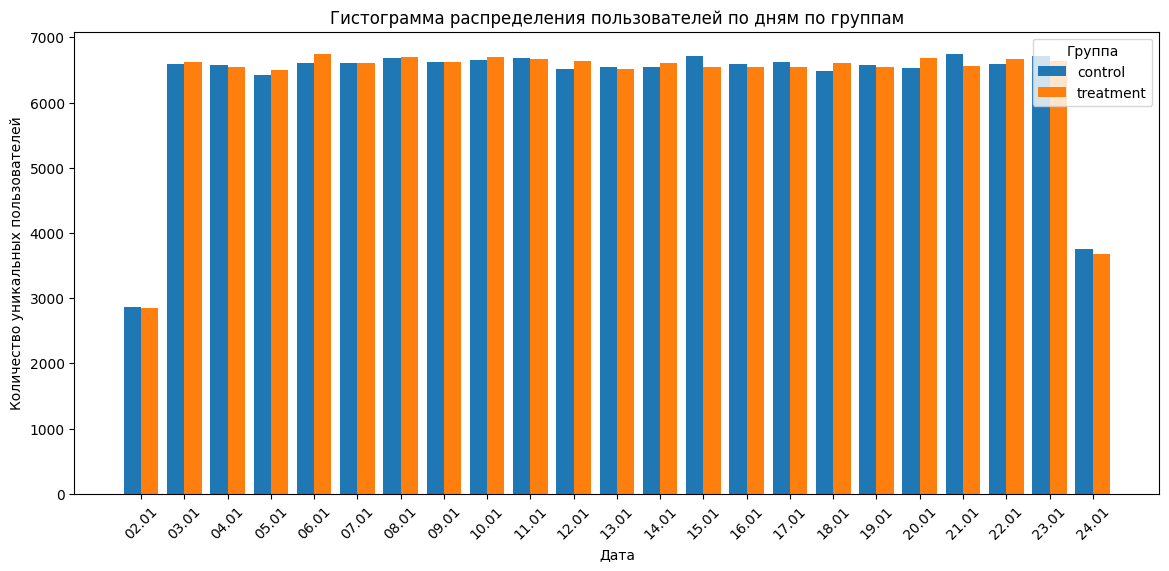

In [55]:

from matplotlib.dates import DateFormatter
import numpy as np

df_clean["date"] = pd.to_datetime(df_clean["timestamp"]).dt.date
# Считаем уникальных пользователей по дням и группам
daily_counts = (
    df_clean.groupby(["date", "group"])["user_id"]
    .nunique()
    .reset_index()
)

daily_counts["date"] = pd.to_datetime(daily_counts["date"])

# Получаем список дней и групп
dates = sorted(daily_counts["date"].unique())
groups = daily_counts["group"].unique()

# Ширина одного столбика
bar_width = 0.4

# Сдвиги для control и treatment
x = np.arange(len(dates))
offsets = np.linspace(-bar_width/2, bar_width/2, len(groups))


# ---------- 2. Построение графика ----------
plt.figure(figsize=(14, 6))

for i, group in enumerate(groups):
    group_data = daily_counts[daily_counts["group"] == group]
    # выравниваем по полному списку дней
    counts = [group_data[group_data["date"] == d]["user_id"].values[0]
              if d in group_data["date"].values else 0
              for d in dates]

    plt.bar(x + offsets[i], counts, width=bar_width, label=group)


# ---------- 3. Настройка осей ----------
plt.title("Гистограмма распределения пользователей по дням по группам")
plt.xlabel("Дата")
plt.ylabel("Количество уникальных пользователей")

# Замена тиков на формат ДД.ММ
date_labels = [d.strftime("%d.%m") for d in dates]
plt.xticks(x, date_labels, rotation=45)

plt.legend(title="Группа")
plt.show()

Распределение трафика стабильно, разница между группами соответствует ожиданяим, у эксперимента нет перекоса по дням, нет появления ложного эффекта. То есть эксперимент корректно сбалансирован во времени.

2. График конверсии по дням по группам

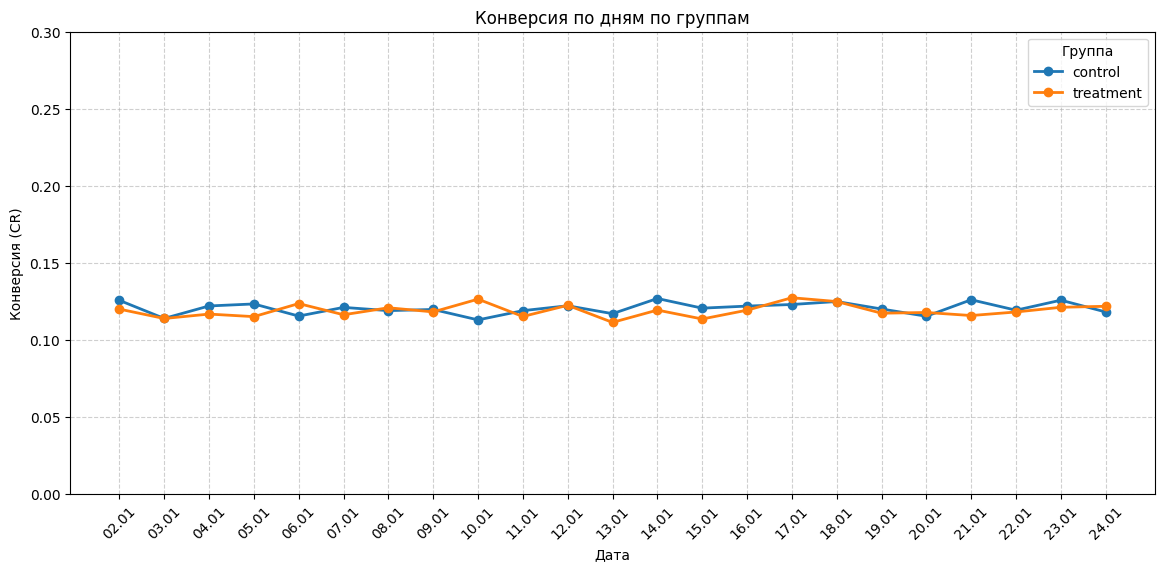

In [56]:
from matplotlib.dates import DateFormatter

# преобразуем дату
df["date"] = pd.to_datetime(df_clean["timestamp"]).dt.floor("D")

# агрегируем
daily_stats = (
    df_clean.groupby(["date", "group"])
    .agg(
        users=("user_id", "nunique"),
        conversions=("converted", "sum")
    )
    .reset_index()
)

# считаем CR
daily_stats["conversion_rate"] = daily_stats["conversions"] / daily_stats["users"]

# подготавливаем ось времени и группы
dates = daily_stats["date"].sort_values().unique()
groups = daily_stats["group"].unique()

x = range(len(dates))

plt.figure(figsize=(14, 6))

for group in groups:
    group_df = daily_stats[daily_stats["group"] == group].set_index("date")
    group_df = group_df.reindex(dates)  # чтобы дни совпадали

    plt.plot(x, group_df["conversion_rate"], marker="o", linewidth=2, label=group)

# оформление
plt.title("Конверсия по дням по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия (CR)")

date_labels = [d.strftime("%d.%m") for d in dates]
plt.xticks(x, date_labels, rotation=45)

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Группа")

# ...
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Группа")

plt.ylim(0, 0.3)  # <- ось Y от 0 до 0.3

plt.show()

plt.show()

проанализируем также дневные разницы

In [57]:
from scipy.stats import ttest_1samp

daily_stats = (
    df.assign(date=pd.to_datetime(df_clean["timestamp"]).dt.floor("D"))
    .groupby(["date", "group"])
    .agg(
        users=("user_id", "nunique"),
        conversions=("converted", "sum")
    )
    .reset_index()
)
daily_stats["cr"] = daily_stats["conversions"] / daily_stats["users"]

pivot = daily_stats.pivot(index="date", columns="group", values="cr")

pivot["diff"] = pivot["treatment"] - pivot["control"]
print(pivot["diff"].describe())

# t-тест: средняя дневная разница = 0 ?
t_stat, p_val = ttest_1samp(pivot["diff"].dropna(), 0)
print("t-stat:", t_stat)
print("p-value:", p_val)

count    23.000000
mean     -0.001596
std       0.005556
min      -0.010243
25%      -0.005468
50%      -0.002658
75%       0.001077
max       0.013480
Name: diff, dtype: float64
t-stat: -1.3778723354448241
p-value: 0.18209782886990025


Статистика по diff = CR_treatment – CR_control:

	•	mean = –0.0016 → в среднем treatment ниже control на 0.16 п.п. (0.0016 в долях).
	•	std = 0.0056 → типичное дневное отклонение ≈ 0.56 п.п.
	•	min ≈ –1.02 п.п., max ≈ +1.35 п.п. → в отдельные дни разница гуляет примерно в пределах ±1–1.3 п.п., что сопоставимо с нормальным статистическим шумом при суточных объёмах.
	•	t-тест:
	•	t-stat = –1.38
	•	p-value = 0.182

p-value = 0.18 значительно больше 0.05, поэтому у нас нет оснований отвергать гипотезу, что средняя дневная разница равна нулю

в разные дни то одна группа чуть выше, то другая, но в среднем по периодu никакого систематического отрыва treatment от control не наблюдается — это ровно то, что мы хотим видеть на этапе проверки валидности.


посмотрим корреляцию

In [58]:
corr = pivot["control"].corr(pivot["treatment"])
print("Корреляция дневных CR:", corr)

Корреляция дневных CR: 0.06476419122141583


In [59]:
qcontrol = df[df["group"] == "control"]
treatment = df[df["group"] == "treatment"]

# Размеры групп
n_c = len(control)
n_t = len(treatment)

# Конверсии
p_c = control["converted"].mean()
p_t = treatment["converted"].mean()

# Объединённая (pooled) конверсия
p_pool = (control["converted"].sum() + treatment["converted"].sum()) / (n_c + n_t)

# Стандартная ошибка разницы пропорций
SE = np.sqrt(p_pool * (1 - p_pool) * (1/n_c + 1/n_t))

# MDE при power=0.8 (Z = 1.96 + 0.84 ≈ 2.8)
MDE = 2.8 * SE

print("Размер контрольной группы:", n_c)
print("Размер тестовой группы:", n_t)
print("Базовая конверсия:", round(p_c, 5))
print("Стандартная ошибка (SE):", SE)
print("MDE (в абсолютных долях):", MDE)
print("MDE (в процентах):", MDE * 100)

NameError: name 'control' is not defined

3. Проверка одновременности запуска

In [69]:
start_times = (
    df.groupby("group")["timestamp"]
    .min()
    .sort_values()
)
print('запуск')
print(start_times)

group
treatment    2025-01-02 13:42:05.378582
control      2025-01-02 13:42:15.234051
Name: timestamp, dtype: object


In [70]:
end_times = (
    df.groupby("group")["timestamp"]
    .max()
    .sort_values()
)
print(end_times)

group
treatment    2025-01-24 13:41:44.097174
control      2025-01-24 13:41:54.460509
Name: timestamp, dtype: object


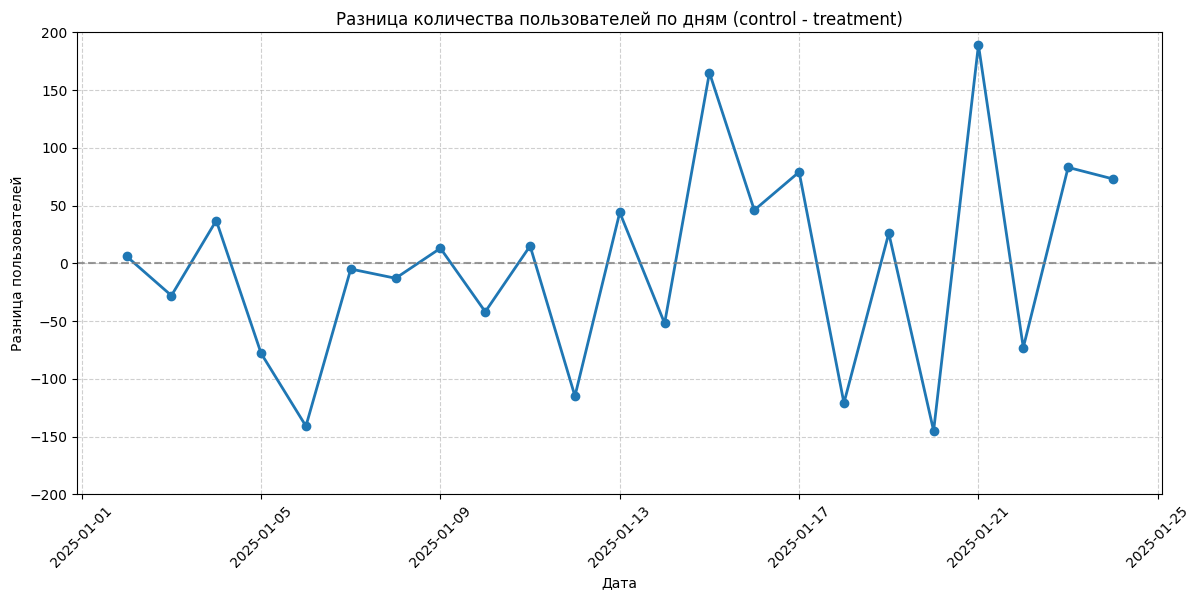

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# выделяем день
df["date"] = pd.to_datetime(df_clean["timestamp"]).dt.date

# считаем количество уникальных пользователей по дням по группам
daily_users = (
    df_clean.groupby(["date", "group"])["user_id"]
    .nunique()
    .reset_index()
)

# делаем wide-формат: control | treatment
pivot = daily_users.pivot(index="date", columns="group", values="user_id")

# считаем разницу
pivot["diff"] = pivot["control"] - pivot["treatment"]

# строим график разницы
plt.figure(figsize=(14, 6))
plt.plot(pivot.index, pivot["diff"], marker="o", linewidth=2)

plt.axhline(0, linestyle="--", color="gray", alpha=0.8)
plt.title("Разница количества пользователей по дням (control - treatment)")
plt.xlabel("Дата")
plt.ylabel("Разница пользователей")
plt.ylim(-200, 200)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()

	1.	Одновременность запуска и окончания.
Первые и последние события в control и treatment отличаются менее чем на 10 секунд, то есть группы начали и завершили получение трафика практически одновременно. Дополнительно график кумулятивного набора пользователей и разницы по дням показывает отсутствие периода, когда одна группа была “пустой” или существенно отставала по трафику.

	2.	Баланс трафика по дням.
Количество уникальных пользователей по дням в control и treatment колеблется вокруг нулевой разницы; величина дневных отклонений составляет десятки пользователей при общем дневном трафике в тысячи, что укладывается в нормальный статистический разброс. Явных перекосов в пользу одной из групп по времени нет.

4. MDE

In [73]:
import numpy as np
from scipy.stats import norm

# 1. Размеры групп
group_sizes = df.groupby("group")["user_id"].nunique()
n_control = group_sizes["control"]
n_treat = group_sizes["treatment"]

# 2. Базовая конверсия (возьмём среднюю между группами)
cr_control = df[df["group"] == "control"]["converted"].mean()
cr_treat = df[df["group"] == "treatment"]["converted"].mean()

p = (cr_control + cr_treat) / 2  # baseline conversion

# 3. Критические значения Z
alpha = 0.05
power = 0.8

z_alpha = norm.ppf(1 - alpha/2)
z_beta = norm.ppf(power)

# 4. Расчёт стандартной ошибки и MDE
se = np.sqrt(p * (1 - p) * (1/n_control + 1/n_treat))
MDE = (z_alpha + z_beta) * se

print("Размер контрольной группы:", n_control)
print("Размер тестовой группы:", n_treat)
print("Базовая конверсия:", round(p, 5))
print("Стандартная ошибка:", round(se, 6))
print("MDE (в абсолютных долях):", round(MDE, 6))
print("MDE (в процентах):", round(MDE * 100, 4), "%")

Размер контрольной группы: 145274
Размер тестовой группы: 145310
Базовая конверсия: 0.1196
Стандартная ошибка: 0.001204
MDE (в абсолютных долях): 0.003373
MDE (в процентах): 0.3373 %


При текущих размерах выборок (≈146 тыс. пользователей в каждой группе) и базовой конверсии ~11.97% минимальный детектируемый эффект (MDE) составляет 0.34 п.п., что эквивалентно около 2.8% относительного изменения конверсии. Это означает, что эксперимент обладает достаточной статистической мощностью для надёжного выявления изменений конверсии на уровне 0.34 п.п. и выше; более мелкие эффекты могут не быть обнаружены как статистически значимые.

# Общие выводы для перехода к финальному анализу эффекта

Сводка ключевых выводов по валидации эксперимента

1. **Одновременность запуска и окончания — подтверждена**

Разница между первыми и последними событиями в группах < 10 секунд.
→ обе группы начали получать трафик одновременно, асинхронности нет.

2. **Трафик по дням распределён корректно**

Количество уникальных пользователей в control и treatment каждый день находится на сопоставимом уровне.
→ нет перекоса по дням, нет риска ложного эффекта из-за трафика.

3. **Разница трафика по дням колеблется около нуля**

Дневная разница в трафике ±20–150 пользователей при дневном трафике ~6500+.
→ это нормальный статистический шум, систематического перекоса нет.

4. **Дневная конверсия ведёт себя стабильно и синхронно**

Графики CR по дням у control и treatment ведут себя параллельно, без устойчивого отрыва.
→ сезонность и дневные колебания одинаково влияют на обе группы.

5. **Дневные разницы CR незначимы статистически**

Средняя дневная разница = –0.16 п.п.
t-тест: p-value = 0.18 (> 0.05).
→ нет оснований считать, что CR систематически отличается между группами до анализа эффекта.

6. **Корреляция дневных CR ≈ 0.06 — это норма для 23 точек**

Малая корреляция обусловлена отсутствием сильной сезонности.
→ не говорит о проблеме сплита.

7. **A/A-тест пройден успешно**

Распределения p-value равномерны, χ²-тесты не выявляют отклонений.
→ группы эквивалентны, тест корректен.

8. **MDE ≈ 0.336 п.п. (≈ 2.8% относительного прироста)**

При текущем объёме выборок (~146k на группу) минимальный детектируемый эффект составляет около 0.34 п.п.
→ тест способен надёжно увидеть эффекты ≥ 0.34 п.п.
